<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Classificacao_Alphaca_MLPClassifier_GoogleDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 06/07/2021

In [11]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd #dataframe
import cv2  #biblioteca que trabalha com imagens
import random #gerar numeros aleatorios
import zipfile  #para trabalhar com arquivos zip
from sklearn.neural_network import MLPClassifier #ANN
from sklearn import preprocessing #Normalização dos dados
from sklearn.model_selection import train_test_split  #Separa os dados como treino e teste
from sklearn.metrics import classification_report #Matriz confusão 

In [12]:
#Importando os arquivos que estão no googledrive
!gdown --id 1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH

Downloading...
From: https://drive.google.com/uc?id=1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH
To: /content/Animals.zip
122MB [00:03, 32.2MB/s]


In [13]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Animals.zip']  #importando os arquivos
Image_Size=300
Image_Name=[]  #lista em branco para armazenar os nomes das imagens 
X_Original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
          X_Original.append(cv2.resize(cv2.cvtColor(cv2.imread(Name),cv2.COLOR_BGR2RGB),(Image_Size,Image_Size))) #convertendo as imagens para RGB 

In [14]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)
  #print(Y_Names)

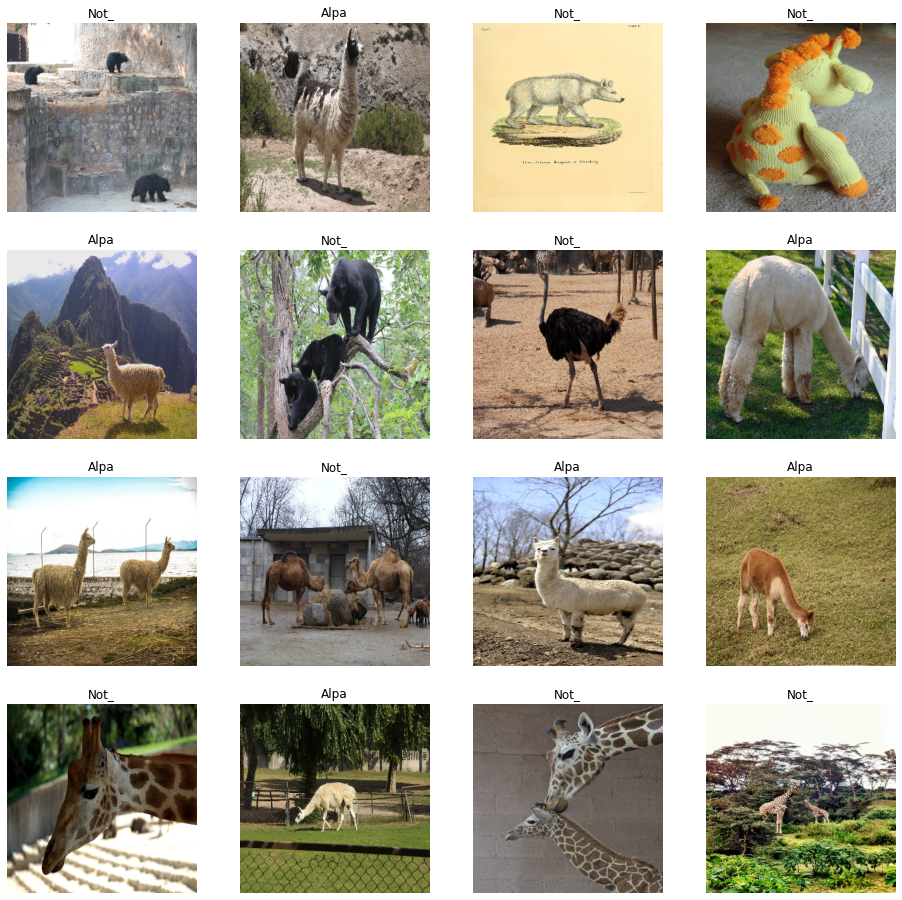

In [15]:
#Plotando algumas imagens em coloridas com seus respectivos nomes (4 primeiras letras)
num = len(Y_Names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(X_Original[kk])
  plt.title(Y_Names[kk])
  plt.axis("off")

In [16]:
Unique_List = []      #gera uma lista unica da ANN
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy) 

In [17]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [18]:
Unique_List #mostrandoa lista unica com as classes 

['Alpa', 'Not_']

In [19]:
X_Data=[]
for xx in X_Original:  #lendo  as fotos 
  X_Data.append(xx.ravel())  # cada linha é uma variável dependente que passou de matriz para linha

X = pd.DataFrame(X_Data)  #passando os dados X_Data para dataframe

In [20]:
#Separando os dados em 55% de treino e 45% de teste e misturando os dados
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.45, shuffle=True, random_state=3)

In [21]:
#Escalonando os dados entre -1 e 1, usando a função preprocessing:
Scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
X_Train = Scaler_X.transform(X_Train)
X_Test = Scaler_X.transform(X_Test)

In [22]:
#Definindo a rede neural:
model = MLPClassifier(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(32,32),
                      max_iter=2000,random_state=1)
model.fit(X_Train,Y_Train) #Treinando a rede neural

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
#Calculando treino e teste por meio da rede neural
Y_Calc_Train=model.predict(X_Train)
Y_Calc_Test=model.predict(X_Test)

In [24]:
#Fazendo a matriz confusão para treino 
df = pd.DataFrame({'True':Y_Train, 'Calc':Y_Calc_Train})
print(pd.crosstab(df['True'],df['Calc']))

Calc   0   1
True        
0     70   5
1      6  98


In [25]:
#Fazendo a matriz confusão para teste
df = pd.DataFrame({'True':Y_Test, 'Calc':Y_Calc_Test})
print(pd.crosstab(df['True'],df['Calc']))

Calc   0   1
True        
0     31  36
1     27  54


In [26]:
#Chamando a métrica Classification Report
Y_True = Y_Test #Amazenando os dados de teste em Y_True
Y_Pred = Y_Calc_Test #Armazenando os dados calculados para teste em Y_Pred
Title = ['Alpaca','Not_Alpaca']
print(classification_report(Y_True, Y_Pred,target_names=Title)) #Verificando se o método foi eficiente 

              precision    recall  f1-score   support

      Alpaca       0.53      0.46      0.50        67
  Not_Alpaca       0.60      0.67      0.63        81

    accuracy                           0.57       148
   macro avg       0.57      0.56      0.56       148
weighted avg       0.57      0.57      0.57       148

